In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
PROJECT_ROOT_DIR = '/content/drive/MyDrive/signlab/위너택_분석'

In [4]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import pandas as pd
import numpy as np
import os

# 진행률 표시
from tqdm.auto import tqdm

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
""
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
mpl.rcParams['font.size'] = 23
mpl.rcParams['figure.figsize'] = (20, 20)
fm._rebuild()

# 한글 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
#mpl.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
mpl.rc('font', family=font_name) #윈도우, 구글 콜랩
mpl.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

# 그림을 저장할 위치
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    #print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 위너택 유형별 불량현황_210917.xlsx

- 렉 관련 데이터 분석
- 미도금_랙, 에어포켓_렉, 찍힘_렉 데이터는 없음

In [5]:
df = pd.read_excel(os.path.join(PROJECT_ROOT_DIR,'위너택 유형별 불량현황_210917.xlsx'),
                   sheet_name='6월',
                   header=2,
                   )
df.tail()

,일자,생산량_랙,생산량_바렐,불량 합계_랙,불량 합계_바렐,얼룩_랙,얼룩_바렐,미도금_랙,미도금_바렐,에어포켓_랙,에어포켓_바렐,찍힘_랙,찍힘_바렐,기타_랙,기타_바렐
16,2021-06-23,37112,67315.0,0,30,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
17,2021-06-24,40652,111475.0,0,25,NaN,7.0,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN
18,2021-06-25,32354,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2021-06-28,44975,107955.0,105,24,105.0,8.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN
20,2021-06-29,43490,84094.0,0,96,NaN,67.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 'Data_Time' 필드의 type을 data_time으로 변환
from datetime import datetime
pd.to_datetime(df['일자'])

0    2021-06-01
1    2021-06-02
2    2021-06-03
3    2021-06-04
4    2021-06-07
5    2021-06-08
6    2021-06-09
7    2021-06-10
8    2021-06-11
9    2021-06-14
10   2021-06-15
11   2021-06-16
12   2021-06-17
13   2021-06-18
14   2021-06-21
15   2021-06-22
16   2021-06-23
17   2021-06-24
18   2021-06-25
19   2021-06-28
20   2021-06-29
Name: 일자, dtype: datetime64[ns]

In [7]:
df.set_index('일자', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2021-06-01 to 2021-06-29
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   생산량_랙     21 non-null     int64  
 1   생산량_바렐    20 non-null     float64
 2   불량 합계_랙   21 non-null     int64  
 3   불량 합계_바렐  21 non-null     int64  
 4   얼룩_랙      3 non-null      float64
 5   얼룩_바렐     9 non-null      float64
 6   미도금_랙     0 non-null      float64
 7   미도금_바렐    13 non-null     float64
 8   에어포켓_랙    0 non-null      float64
 9   에어포켓_바렐   0 non-null      float64
 10  찍힘_랙      0 non-null      float64
 11  찍힘_바렐     0 non-null      float64
 12  기타_랙      1 non-null      float64
 13  기타_바렐     0 non-null      float64
dtypes: float64(11), int64(3)
memory usage: 2.5 KB


In [8]:
lec_df_names=['불량 합계_랙','얼룩_랙', '기타_랙']
lec_df = df[lec_df_names]
lec_df.head()

,불량 합계_랙,얼룩_랙,기타_랙
일자,,,
2021-06-01,0,NaN,NaN
2021-06-02,0,NaN,NaN
2021-06-03,3600,NaN,3600.0
2021-06-04,0,NaN,NaN
2021-06-07,0,NaN,NaN


## 렉에 대힌 통계

In [9]:
lec_df.describe()

,불량 합계_랙,얼룩_랙,기타_랙
count,21.000000,3.000000,1.0
mean,181.047619,67.333333,3600.0
std,783.819078,33.080709,NaN
min,0.000000,43.000000,3600.0
25%,0.000000,48.500000,3600.0
50%,0.000000,54.000000,3600.0
75%,0.000000,79.500000,3600.0
max,3600.000000,105.000000,3600.0


### 그래프

### 2021.01 ~ 2021.7 까지의 랙 불량률 추세

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '6월 불량 합계_랙')

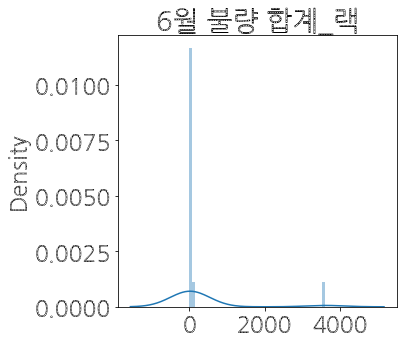

In [10]:
plt.figure(figsize=(5,5))
sns.distplot(lec_df)
plt.title('6월 불량 합계_랙')

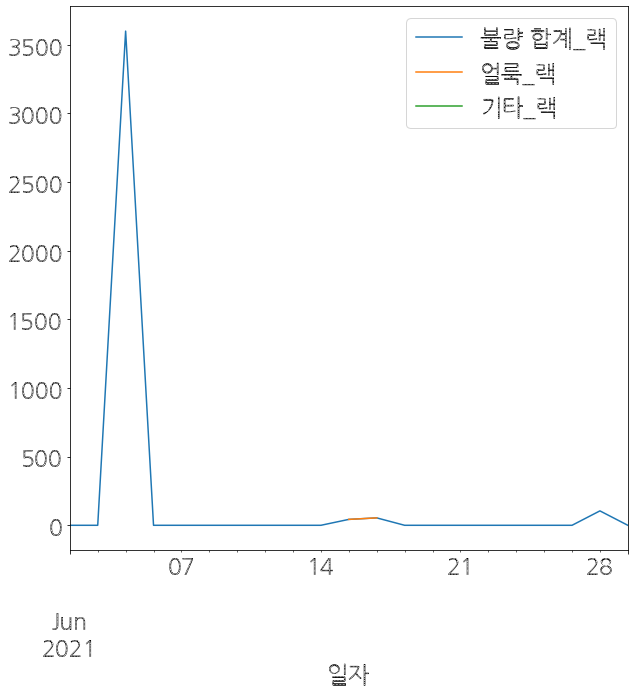

In [11]:
lec_df.plot(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41fa9b4b10>,
      dtype=object)

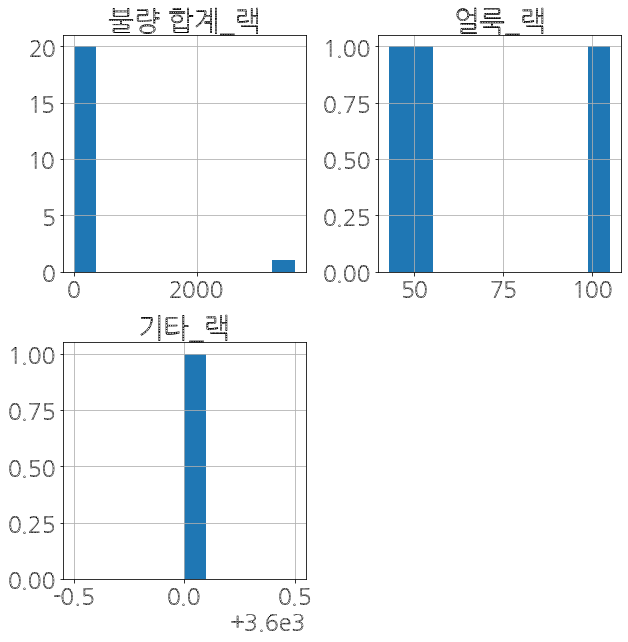

In [12]:
lec_df.hist(figsize=(10,10))

In [13]:
lec_all = pd.read_excel(os.path.join(PROJECT_ROOT_DIR,'위너택데이터 렉_20210916.xlsx'),
                   sheet_name=None)

In [14]:
lec_all = pd.concat(lec_all, ignore_index=True)
lec_all

,시간,알칼리탈지-농도,알칼리탈지-온도,알칼리탈지-ph,알칼리탈지-초음파발진,알칼리수세-ph,알칼리수세-OverFlow,염산산세-농도,염산산세-ph,염산산세-온도조절,염산수세-농도,염산수세-OverFlow,중화-농도,중화-ph,중화-ph 조절,아연도금-온도,아연도금-전압,아연도금-전류,도금수세-ph,도금수세-OverFlow,도금수세-전도도,활성화,크로메이트(백색)-온도,크로메이트(백색)-pH,크로메이트(유색)-온도,크로메이트(유색)-pH,크로메이트수세-pH,크로메이트수세-OverFlow,건조-1차,건조-2차,박리조1-온도조절,박리조2-온도조절
0,2021-06-03 11:29:47,0,0,0,0,0,0,0,0,LLLL,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,34,0
1,2021-06-03 11:29:52,0,0,0,0,0,0,0,0,LLLL,0,0,0,0,1.95,0,0,0,0,0,2.077,0,0,0,0,0,0,0,0,0,34,33
2,2021-06-03 11:29:57,0,0,0,0,0,0,0,0,LLLL,0,0,0,0,1.95,0,0,0,0,0,1.848,0,0,0,0,0,0,0,0,0,33,33
3,2021-06-03 11:30:02,0,0,0,0,0,0,0,0,LLLL,0,0,0,0,1.95,0,0,0,0,0,1.988,0,0,0,0,0,0,0,0,0,33,33
4,2021-06-03 11:30:07,0,0,0,0,0,0,0,0,LLLL,0,0,0,0,1.96,0,0,0,0,0,1.988,0,0,0,0,0,0,0,0,0,34,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113439,2021-06-29 16:40:55,0,0,0,0,0,0,0,0,31,0,0,0,0,1.99,0,0,0,0,0,1.861,0,0,0,0,0,0,0,0,0,0,0
113440,2021-06-29 16:40:56,0,0,0,0,0,0,0,0,31,0,0,0,0,1.99,0,0,0,0,0,1.861,0,0,0,0,0,0,0,0,0,0,0
113441,2021-06-29 16:40:57,0,0,0,0,0,0,0,0,31,0,0,0,0,1.99,0,0,0,0,0,1.861,0,0,0,0,0,0,0,0,0,0,0
113442,2021-06-29 16:40:58,0,0,0,0,0,0,0,0,31,0,0,0,0,1.99,0,0,0,0,0,1.861,0,0,0,0,0,0,0,0,0,0,0


In [15]:
lec_all = lec_all.replace(0, np.NaN)
lec_all.set_index('시간', inplace=True)
lec_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113444 entries, 2021-06-03 11:29:47 to 2021-06-29 16:40:59
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   알칼리탈지-농도          0 non-null       float64
 1   알칼리탈지-온도          0 non-null       float64
 2   알칼리탈지-ph          0 non-null       float64
 3   알칼리탈지-초음파발진       0 non-null       float64
 4   알칼리수세-ph          0 non-null       float64
 5   알칼리수세-OverFlow    0 non-null       float64
 6   염산산세-농도           0 non-null       float64
 7   염산산세-ph           0 non-null       float64
 8   염산산세-온도조절         65368 non-null   object 
 9   염산수세-농도           0 non-null       float64
 10  염산수세-OverFlow     0 non-null       float64
 11  중화-농도             0 non-null       float64
 12  중화-ph             0 non-null       float64
 13  중화-ph 조절          106232 non-null  object 
 14  아연도금-온도           0 non-null       float64
 15  아연도금-전압           0 non-null      

In [16]:
lec_all.fillna(lec_all.mean())

,알칼리탈지-농도,알칼리탈지-온도,알칼리탈지-ph,알칼리탈지-초음파발진,알칼리수세-ph,알칼리수세-OverFlow,염산산세-농도,염산산세-ph,염산산세-온도조절,염산수세-농도,염산수세-OverFlow,중화-농도,중화-ph,중화-ph 조절,아연도금-온도,아연도금-전압,아연도금-전류,도금수세-ph,도금수세-OverFlow,도금수세-전도도,활성화,크로메이트(백색)-온도,크로메이트(백색)-pH,크로메이트(유색)-온도,크로메이트(유색)-pH,크로메이트수세-pH,크로메이트수세-OverFlow,건조-1차,건조-2차,박리조1-온도조절,박리조2-온도조절
시간,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-06-03 11:29:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LLLL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,34.868819
2021-06-03 11:29:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LLLL,NaN,NaN,NaN,NaN,1.95,NaN,NaN,NaN,NaN,NaN,2.07700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,33.000000
2021-06-03 11:29:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LLLL,NaN,NaN,NaN,NaN,1.95,NaN,NaN,NaN,NaN,NaN,1.84800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,33.000000
2021-06-03 11:30:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LLLL,NaN,NaN,NaN,NaN,1.95,NaN,NaN,NaN,NaN,NaN,1.98800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,33.000000
2021-06-03 11:30:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LLLL,NaN,NaN,NaN,NaN,1.96,NaN,NaN,NaN,NaN,NaN,1.98800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,33.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-29 16:40:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,NaN,1.99,NaN,NaN,NaN,NaN,NaN,1.86100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.746803,34.868819
2021-06-29 16:40:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,NaN,1.99,NaN,NaN,NaN,NaN,NaN,1.86100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.746803,34.868819
2021-06-29 16:40:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,NaN,1.99,NaN,NaN,NaN,NaN,NaN,1.86100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.746803,34.868819


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '박리조1-온도조절 센서 공정 능력 시각화')

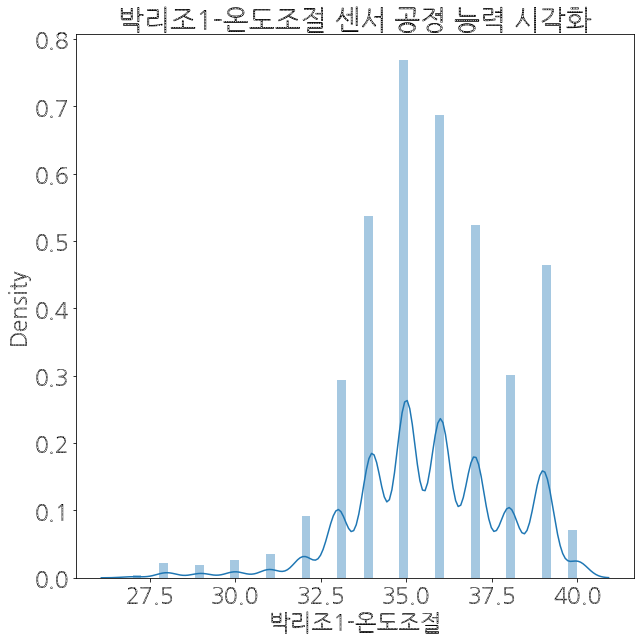

In [17]:
plt.figure(figsize=(10,10))
sns.distplot(a=lec_all['박리조1-온도조절'])
plt.title('박리조1-온도조절 센서 공정 능력 시각화')

In [18]:
# 박리조1-온도조절 평균
lec_all['박리조1-온도조절'].mean()

35.74680306905371

Text(0.5, 1.0, '박리조1-온도조절 센서 공정능력 6월 일별 시각화')

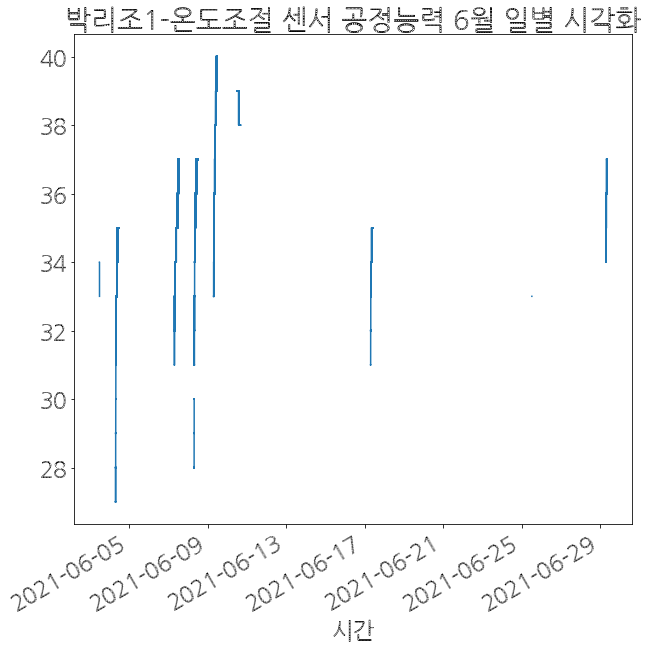

In [19]:
lec_all['박리조1-온도조절'].plot(figsize=(10,10))
plt.title('박리조1-온도조절 센서 공정능력 6월 일별 시각화')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '박리조2-온도조절 공정 능력 시각화')

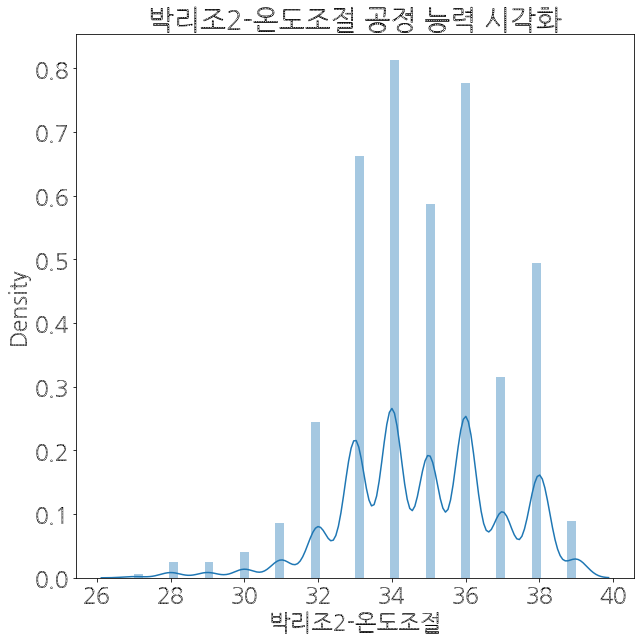

In [20]:
plt.figure(figsize=(10,10))
sns.distplot(lec_all['박리조2-온도조절'])
plt.title('박리조2-온도조절 공정 능력 시각화')

In [21]:
# 박리조2-온도조절 평균
lec_all['박리조2-온도조절'].mean()

34.86881915860373

Text(0.5, 1.0, '박리조2-온도조절 공정 능력 6월 일별 시각화')

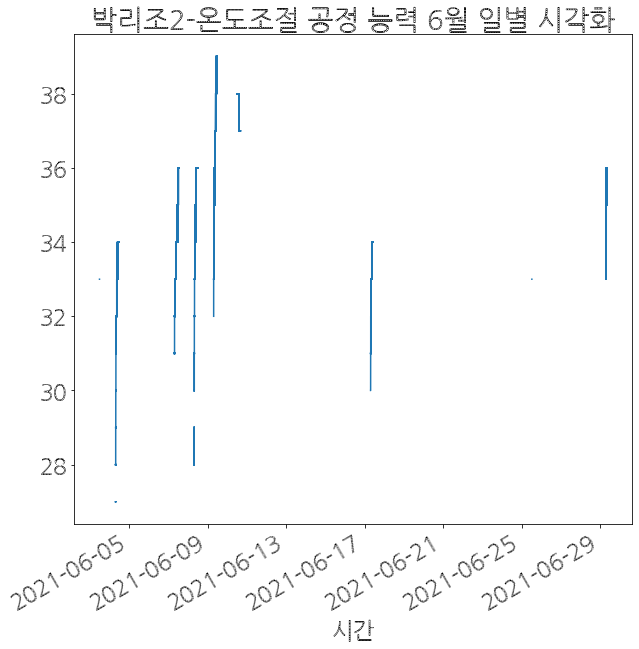

In [22]:
lec_all['박리조2-온도조절'].plot(figsize=(10,10))
plt.title('박리조2-온도조절 공정 능력 6월 일별 시각화')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '도금수세-전도도 공정 능력 6월 일별 시각화')

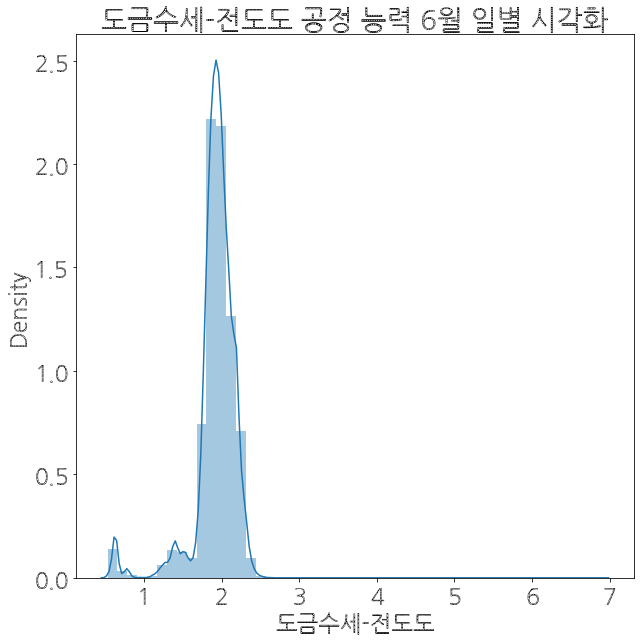

In [23]:
plt.figure(figsize=(10,10))
sns.distplot(lec_all['도금수세-전도도'])
plt.title('도금수세-전도도 공정 능력 6월 일별 시각화')

In [24]:
# 도금수세-전도도 평균
lec_all['도금수세-전도도'].mean()

1.9207598959485566

Text(0.5, 1.0, '도금수세-전도도 공정 능력 6월 일별 시각화')

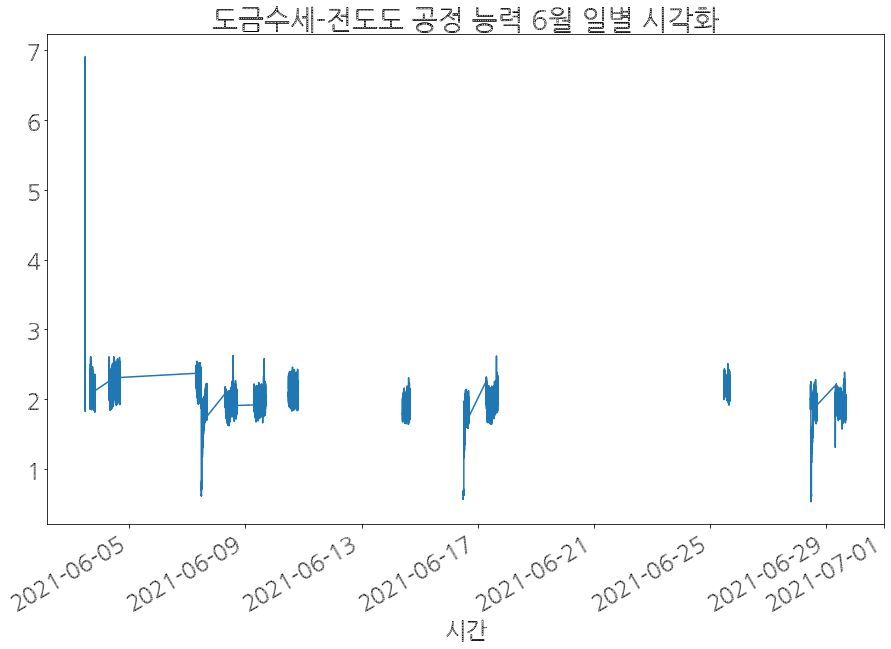

In [25]:
lec_all['도금수세-전도도'].plot(figsize=(15,10))
plt.title('도금수세-전도도 공정 능력 6월 일별 시각화')

## 공정능력과 불량률 사이의 상관관계

### 공정능력 사이의 상관계수 히트맵

- 측정값이 있는 센서는 염산산세-온도조절, 중화-ph 조절, 도금수세-전도도, 박리조1-온도조절, 박리조2-온도조절 5가지
- 그 중 분석 가능한 숫자 값을 가지는 센서는 도금수세-전도도, 박리조1,2로 3가지


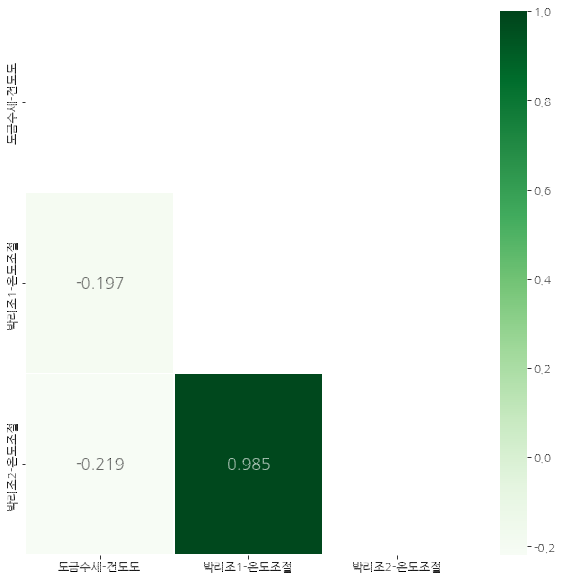

In [26]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (10, 10)
mask = np.zeros_like(lec_all[['도금수세-전도도','박리조1-온도조절', '박리조2-온도조절']].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = lec_all[['도금수세-전도도','박리조1-온도조절', '박리조2-온도조절']].corr(), mask=mask, annot=True, annot_kws={"size":16}, fmt = '.3f', linewidths=0.1, vmax=1.0, cmap='Greens')

In [27]:
lec_fail_df = lec_df[['얼룩_랙', '기타_랙']]

### 불량 데이터와 센서데이터 사이의 히트맵
- 상관관계가 전혀 관찰되지 않음


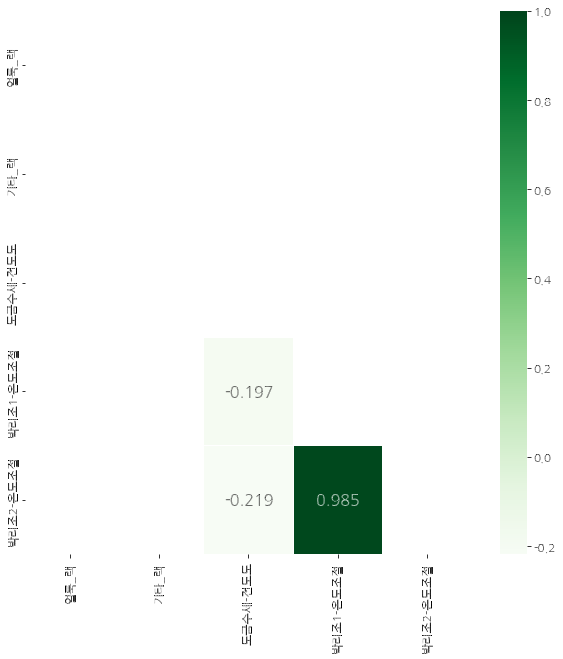

In [28]:
graph_df = pd.concat([lec_fail_df,lec_all[['도금수세-전도도','박리조1-온도조절', '박리조2-온도조절']]])

mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (10, 10)
mask = np.zeros_like(graph_df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = graph_df.corr(), mask=mask, annot=True, annot_kws={"size":16}, fmt = '.3f', linewidths=0.1, vmax=1.0, cmap='Greens')

In [29]:
graph_df.corr()

,얼룩_랙,기타_랙,도금수세-전도도,박리조1-온도조절,박리조2-온도조절
얼룩_랙,1.0,NaN,NaN,NaN,NaN
기타_랙,NaN,NaN,NaN,NaN,NaN
도금수세-전도도,NaN,NaN,1.000000,-0.197255,-0.218861
박리조1-온도조절,NaN,NaN,-0.197255,1.000000,0.984854
박리조2-온도조절,NaN,NaN,-0.218861,0.984854,1.000000


### 불량 데이터 간의 히트맵

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


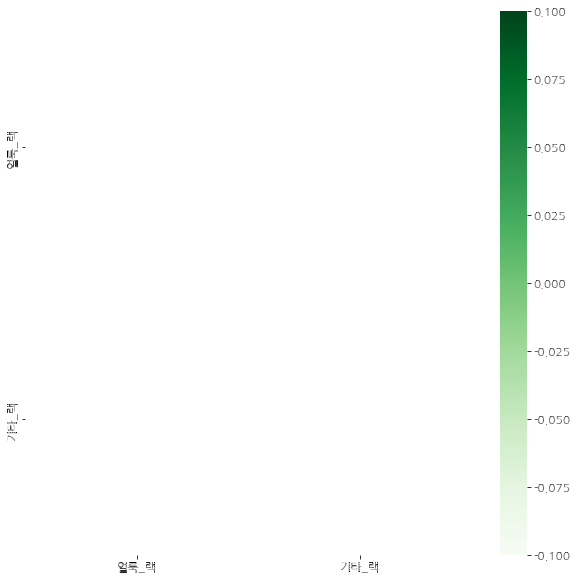

In [30]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (10, 10)
mask = np.zeros_like(lec_fail_df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = lec_fail_df.corr(), mask=mask, annot=True, annot_kws={"size":16}, fmt = '.3f', linewidths=0.1, vmax=1.0, cmap='Greens')